In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
df = pd.read_csv("./digit-recognizer/train.csv")
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36838,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


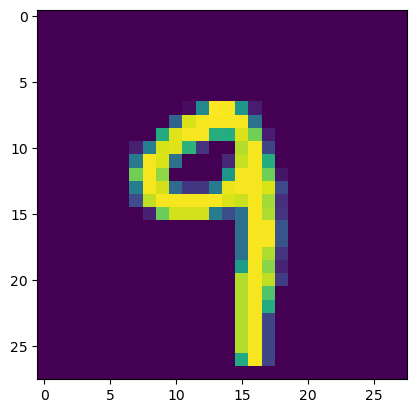

In [10]:
plt.imshow(df.iloc[22302, 1:].values.reshape(28,28))

In [56]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

## Without PCA

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((33600, 784), (33600,))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

7.042060613632202


In [18]:
y_pred[:5]

array([8, 1, 9, 9, 8])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

## With PCA

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)

In [48]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [49]:
X_train_pca.shape

(33600, 300)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
import time
start = time.time()
y_pred_pca = knn.predict(X_test_pca)
print(time.time()-start)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_pca)

1.531311273574829


0.8138095238095238

In [7]:
df = pd.read_csv("./digit-recognizer/train.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in range(1, 785, 20):
    pca = PCA(n_components=i)

    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred_trf = knn.predict(X_test_trf)

    accuracy = accuracy_score(y_test, y_pred_trf)
    print(f"The accuracy when PCA component is {i}: {accuracy}")

The accuracy when PCA component is 1: 0.2580952380952381
The accuracy when PCA component is 21: 0.9438095238095238
The accuracy when PCA component is 41: 0.9522619047619048
The accuracy when PCA component is 61: 0.9547619047619048
The accuracy when PCA component is 81: 0.9551190476190476
The accuracy when PCA component is 101: 0.9542857142857143
The accuracy when PCA component is 121: 0.9533333333333334
The accuracy when PCA component is 141: 0.9522619047619048
The accuracy when PCA component is 161: 0.9521428571428572
The accuracy when PCA component is 181: 0.9513095238095238
The accuracy when PCA component is 201: 0.950595238095238
The accuracy when PCA component is 221: 0.9494047619047619
The accuracy when PCA component is 241: 0.9486904761904762
The accuracy when PCA component is 261: 0.9477380952380953
The accuracy when PCA component is 281: 0.9470238095238095
The accuracy when PCA component is 301: 0.9467857142857142
The accuracy when PCA component is 321: 0.9458333333333333
The 

In [15]:
df = pd.read_csv("./digit-recognizer/train.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)
y_pred_trf = knn.predict(X_test_trf)

accuracy = accuracy_score(y_test, y_pred_trf)
print(f"The accuracy when PCA component is {i}: {accuracy}")

The accuracy when PCA component is 781: 0.9391666666666667


In [16]:
pca.explained_variance_  #Eigen values

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [17]:
pca.components_.shape  # Eigen vector

(784, 784)

`pca.explained_variance_` explain how much variance a particular eigen vector cover
the values coming after this line of code is not percentage, we will need to divide the particular eigen vector with the total of all eigen vector


In [18]:
pca.explained_variance_ratio_  # these three is explaining only 12 percent variance

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

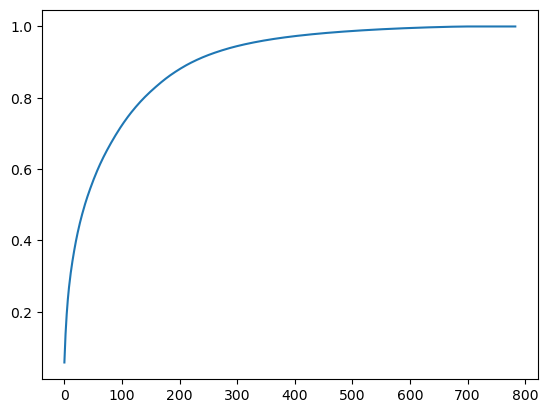

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### When PCA is not helpful

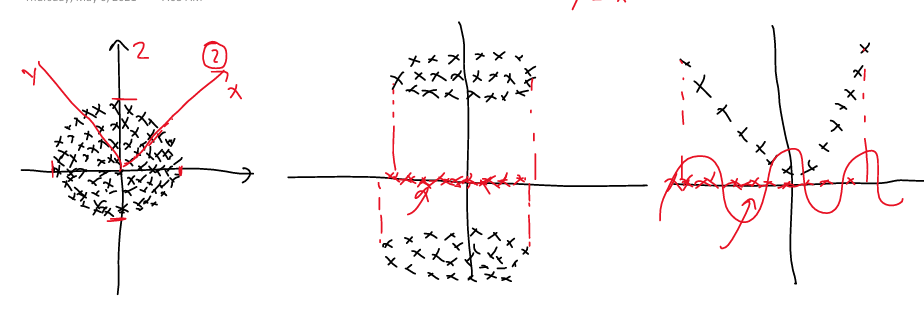

1. When data is mostly in spherical, Variance in X and Y are similar.
2. When we have contrasting data, unable to differentiate in two opposite values
3. Lose the form of higher dimension when reduce the dimensions e.g X^2, Sinx etc, when we go from 2 to 1 dimension we loose the form it has in 2D